In [1]:
import json
import pandas as pd
import seaborn

from scripts.analysis import *
from scripts.data_processing import process_trials

In [2]:
with open('final_pilot_diffplayer_normalized_suspicion_ratings.json', 'r') as f:
    ratings = json.load(f)

In [3]:
uuids = ratings.keys()

In [4]:
with open("./trial_setups/r0.json", "r") as read_file:
    r0 = json.load(read_file)
    r0 = pd.DataFrame.from_dict(r0)

with open("./trial_setups/r1.json", "r") as read_file:
    r1 = json.load(read_file)
    r1 = pd.DataFrame.from_dict(r1)
    
with open("./trial_setups/r2.json", "r") as read_file:
    r2 = json.load(read_file)
    r2 = pd.DataFrame.from_dict(r2)

with open("./trial_setups/r3.json", "r") as read_file:
    r3 = json.load(read_file)
    r3 = pd.DataFrame.from_dict(r3)
    
with open("./trial_setups/r4.json", "r") as read_file:
    r4 = json.load(read_file)
    r4 = pd.DataFrame.from_dict(r4)

with open("./trial_setups/r5.json", "r") as read_file:
    r5 = json.load(read_file)
    r5 = pd.DataFrame.from_dict(r5)
    
with open("./trial_setups/r6.json", "r") as read_file:
    r6 = json.load(read_file)
    r6 = pd.DataFrame.from_dict(r6)

with open("./trial_setups/r7.json", "r") as read_file:
    r7 = json.load(read_file)
    r7 = pd.DataFrame.from_dict(r7)

with open("./trial_setups/r8.json", "r") as read_file:
    r8 = json.load(read_file)
    r8 = pd.DataFrame.from_dict(r8)

with open("./trial_setups/r9.json", "r") as read_file:
    r9 = json.load(read_file)
    r9 = pd.DataFrame.from_dict(r9)

with open("./trial_setups/r10.json", "r") as read_file:
    r10 = json.load(read_file)
    r10 = pd.DataFrame.from_dict(r10)

with open("./trial_setups/r11.json", "r") as read_file:
    r11 = json.load(read_file)
    r11 = pd.DataFrame.from_dict(r11)

In [5]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
cred = credentials.Certificate('D:/Behavioural cybersecurity/project-notes/cards-dd-game-61b9b7f26a6e.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

subjects_ref = db.collection(u'subjects')

In [6]:
tmp = []

for uuid in uuids:
    tmp.append(subjects_ref.document(uuid).get())

In [7]:
condition = {}

for i, uuid in enumerate(uuids):
#     print(i)
    cond = tmp[i].to_dict()['condition']
    condition[uuid] = cond

In [8]:
from skopt.space import Real

param_search_space = [Real(0, 1, name='prior'), Real(0, 1, name='alpha')]

In [ ]:
r012 = ['599186630675b100014daddd', '6119884fd696463d717432c9']
r345 = ['61005d2e9b8bac27eba5b984', '610995bd91de0e899effd73d']
r678 = ['610bb05be2e705f3e47e87fb', '610824959b488e57fa8a4a33', '60f0937892bd49086d6e2a77', '5cf656e90acc8f000147f643']
r91011 = ['5fe292a28fd71dea34d04453', '5d341b57a48ae7000114152a']

In [9]:
for i, uuid in enumerate(uuids):
    print("Subject", i)
    print("PID", uuid)
    
    if uuid in r012:
        trials = process_trials(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_signed_colour_count')

Subject 0
PID 61005d2e9b8bac27eba5b984
Best parameter estimates: prior = 0.10730446891337769 alpha = 0.9892586510872665
R2: 0.5395268786229909
BIC: -260.6136870783689
AIC: -265.61330641902947
Subject 1
PID 610995bd91de0e899effd73d
Best parameter estimates: prior = 0.1459858560666907 alpha = 0.41263490240966866
R2: 0.34704392824487584
BIC: -346.39420369551203
AIC: -351.3938230361726
Subject 2
PID 599186630675b100014daddd
Best parameter estimates: prior = 0.46608145726424727 alpha = 0.05013989371847714
R2: 0.017337538184964196
BIC: -452.0216167244806
AIC: -457.0212360651411
Subject 3
PID 6119884fd696463d717432c9
Best parameter estimates: prior = 0.2803367127570322 alpha = 0.46524419275411205
R2: 0.3607300875123173
BIC: -359.6504323329573
AIC: -364.6500516736178
Subject 4
PID 610bb05be2e705f3e47e87fb
Best parameter estimates: prior = 0.40290552441304955 alpha = 0.10257833777846974
R2: 0.00600133108181744
BIC: -224.4237011490814
AIC: -229.42332048974194
Subject 5
PID 610824959b488e57fa8a4a

In [10]:
for i, uuid in enumerate(uuids):
    print("Subject", i)
    print("PID", uuid)
    
    if uuid in r012:
        trials = process_trials(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_unsigned_colour_count')

Subject 0
PID 61005d2e9b8bac27eba5b984
Best parameter estimates: prior = 0.19351808082710797 alpha = 0.8335120672166778
R2: 0.2811314436930631
BIC: -220.52552340926266
AIC: -225.5251427499232
Subject 1
PID 610995bd91de0e899effd73d
Best parameter estimates: prior = 0.15755904258576234 alpha = 0.41276591406578306
R2: 0.2557195961591846
BIC: -334.61248413381725
AIC: -339.61210347447775
Subject 2
PID 599186630675b100014daddd
Best parameter estimates: prior = 0.46510588113741536 alpha = 0.060379334260679186
R2: 0.023966405070565133
BIC: -452.63079781249087
AIC: -457.63041715315137
Subject 3
PID 6119884fd696463d717432c9
Best parameter estimates: prior = 0.30632795500941107 alpha = 0.43318839980234836
R2: 0.2894643473244881
BIC: -350.13811970575
AIC: -355.13773904641056
Subject 4
PID 610bb05be2e705f3e47e87fb
Best parameter estimates: prior = 0.44624780863696345 alpha = 0.0
R2: -3.1263033495321224e-08
BIC: -223.88195130554055
AIC: -228.88157064620108
Subject 5
PID 610824959b488e57fa8a4a33
Best

In [11]:
for i, uuid in enumerate(uuids):
    print("Subject", i)
    print("PID", uuid)
    
    if uuid in r012:
        trials = process_trials(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_signed_e_v')

Subject 0
PID 61005d2e9b8bac27eba5b984
Best parameter estimates: prior = 0.0 alpha = 0.7442324558917529
R2: 0.6006852646782991
BIC: -273.4390983220312
AIC: -278.4387176626917
Subject 1
PID 610995bd91de0e899effd73d
Best parameter estimates: prior = 0.10688682710624273 alpha = 0.30079620180371414
R2: 0.3421938336695377
BIC: -345.7281629883987
AIC: -350.72778232905927
Subject 2
PID 599186630675b100014daddd
Best parameter estimates: prior = 0.4788580588040128 alpha = 0.0010961348235704203
R2: -2.939763708442733e-05
BIC: -450.44490757259643
AIC: -455.44452691325694
Subject 3
PID 6119884fd696463d717432c9
Best parameter estimates: prior = 0.18418045294396307 alpha = 0.3307064018600721
R2: 0.27990343785596417
BIC: -348.93516250402877
AIC: -353.9347818446893
Subject 4
PID 610bb05be2e705f3e47e87fb
Best parameter estimates: prior = 0.41517402937484504 alpha = 0.05202389192561799
R2: 0.003930576591522739
BIC: -224.23640306404863
AIC: -229.23602240470916
Subject 5
PID 610824959b488e57fa8a4a33
Best 

In [12]:
for i, uuid in enumerate(uuids):
    print("Subject", i)
    print("PID", uuid)
    
    if uuid in r012:
        trials = process_trials(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_unsigned_e_v')

Subject 0
PID 61005d2e9b8bac27eba5b984
Best parameter estimates: prior = 0.0 alpha = 0.6987151584522785
R2: 0.42892668307895987
BIC: -241.24000657723937
AIC: -246.2396259178999
Subject 1
PID 610995bd91de0e899effd73d
Best parameter estimates: prior = 0.059926593732596865 alpha = 0.33818793008390047
R2: 0.24655109818756027
BIC: -333.5105825792914
AIC: -338.5102019199519
Subject 2
PID 599186630675b100014daddd
Best parameter estimates: prior = 0.4795211854918859 alpha = 2.3249499682776954e-17
R2: -1.9385270191296655e-06
BIC: -450.4473788537822
AIC: -455.4469981944427
Subject 3
PID 6119884fd696463d717432c9
Best parameter estimates: prior = 0.23222608523972604 alpha = 0.28892872531975045
R2: 0.2244096980612682
BIC: -342.25364330271634
AIC: -347.2532626433769
Subject 4
PID 610bb05be2e705f3e47e87fb
Best parameter estimates: prior = 0.4231060861429253 alpha = 0.034197204430503274
R2: 0.0010497763725002551
BIC: -223.97648361884194
AIC: -228.97610295950247
Subject 5
PID 610824959b488e57fa8a4a33
B

In [13]:
for i, uuid in enumerate(uuids):
    print("Subject", i)
    print("PID", uuid)
    
    if uuid in r012:
        trials = process_trials(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_cs_signed_e_v')

Subject 0
PID 61005d2e9b8bac27eba5b984
Best parameter estimates: prior = 0.5074321206900408 alpha = 0.0
R2: -5.624485321931161e-09
BIC: -190.81861517196748
AIC: -195.818234512628
Subject 1
PID 610995bd91de0e899effd73d
Best parameter estimates: prior = 0.31303431848723884 alpha = 0.0
R2: -1.7246059846875994e-07
BIC: -308.03210006804215
AIC: -313.0317194087027
Subject 2
PID 599186630675b100014daddd
Best parameter estimates: prior = 0.44889795313013736 alpha = 0.07378956533841419
R2: 0.0808926041537481
BIC: -458.0392604844153
AIC: -463.03887982507587
Subject 3
PID 6119884fd696463d717432c9
Best parameter estimates: prior = 0.2973787257020645 alpha = 0.26798938900776553
R2: 0.24299884202719757
BIC: -344.4370105625536
AIC: -349.43662990321417
Subject 4
PID 610bb05be2e705f3e47e87fb
Best parameter estimates: prior = 0.42989751516481156 alpha = 0.04308546869506887
R2: 0.002710540209599932
BIC: -224.12623395299744
AIC: -229.12585329365797
Subject 5
PID 610824959b488e57fa8a4a33
Best parameter est

In [14]:
for i, uuid in enumerate(uuids):
    print("Subject", i)
    print("PID", uuid)
    
    if uuid in r012:
        trials = process_trials(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_single_model_single_response(hrs, trials, param_search_space, 'normed_cs_unsigned_e_v')

Subject 0
PID 61005d2e9b8bac27eba5b984
Best parameter estimates: prior = 0.5074005784843073 alpha = 0.0
R2: -4.294629096790459e-10
BIC: -190.8186156395195
AIC: -195.81823498018002
Subject 1
PID 610995bd91de0e899effd73d
Best parameter estimates: prior = 0.31292786555021446 alpha = 0.0
R2: -4.1723936528015315e-08
BIC: -308.0321118343404
AIC: -313.03173117500097
Subject 2
PID 599186630675b100014daddd
Best parameter estimates: prior = 0.4418667955962999 alpha = 0.08122415201363717
R2: 0.09802881369445171
BIC: -459.73309665032093
AIC: -464.7327159909815
Subject 3
PID 6119884fd696463d717432c9
Best parameter estimates: prior = 0.2909997716798174 alpha = 0.25384169756189806
R2: 0.21544090980912034
BIC: -341.218870813938
AIC: -346.2184901545985
Subject 4
PID 610bb05be2e705f3e47e87fb
Best parameter estimates: prior = 0.4174043841941226 alpha = 0.057543649001272165
R2: 0.003376049307742379
BIC: -224.18631261111977
AIC: -229.1859319517803
Subject 5
PID 610824959b488e57fa8a4a33
Best parameter estim

In [15]:
def objective_weighted(params, response, trials, stat1: str, stat2: str):
    pred = params[0] + params[1] * trials[stat1] + params[2] * trials[stat2]
    ss_res = np.sum((response-pred)**2)
    return ss_res

In [19]:
def skopt_fit_weighted_model_single_response(response, trials, param_search_space, stat1: str, stat2: str):
    ss_tot = np.sum((response - np.mean(response)) ** 2)
    gp_result = gp_minimize(partial(objective_weighted, response=response, trials=trials, stat1=stat1, stat2=stat2), param_search_space, random_state=42)
    optimal_ss_res = gp_result.fun
    
    print("Best parameter estimates: prior =", gp_result.x[0], "alpha 1 =", gp_result.x[1], "alpha 2 =", gp_result.x[2])
    print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
    
    pred = gp_result.x[0] + gp_result.x[1] * trials[stat1] + gp_result.x[2] * trials[stat2]
    
    mse = mean_squared_error(response, pred)
    bic = calculate_bic(len(response), mse, len(param_search_space))
    aic = calculate_aic(len(response), mse, len(param_search_space))
    
    print("BIC:", bic)
    print("AIC:", aic)
    print("=" * 100)

In [17]:
param_search_space = [Real(0, 1, name='prior'), Real(0, 1, name='alpha1'), Real(0, 1, name='alpha2'), Real(0, 1, name='weight')]

In [33]:
for i, uuid in enumerate(uuids):
    print("Subject", i)
    print("PID", uuid)
    
    if uuid in r012:
        trials = process_trials(pd.concat([r0, r1, r2]).reset_index(), 7)
    elif uuid in r345:
        trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)
    elif uuid in r678:
        trials = process_trials(pd.concat([r6, r7, r8]).reset_index(), 7)
    elif uuid in r91011:
        trials = process_trials(pd.concat([r9, r10, r11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_weighted_model_single_response(hrs, trials, param_search_space, 'normed_signed_e_v', 'normed_signed_colour_count')

Subject 0
PID 61005d2e9b8bac27eba5b984
Best parameter estimates: prior = 0.0 alpha 1 = 0.4636057950575447 alpha 2 = 0.4873338072358108
R2: 0.6673697051492382
BIC: -280.8841231664032
AIC: -290.88336184772425
Subject 1
PID 610995bd91de0e899effd73d
Best parameter estimates: prior = 0.09808772627055168 alpha 1 = 0.17376985168181344 alpha 2 = 0.24087623337382516
R2: 0.40351976936178613
BIC: -345.53632247219633
AIC: -355.5355611535174
Subject 2
PID 599186630675b100014daddd
Best parameter estimates: prior = 0.4668391891828691 alpha 1 = 0.0 alpha 2 = 0.04973187013787431
R2: 0.017198470660135023
BIC: -443.0092613812152
AIC: -453.00850006253626
Subject 3
PID 6119884fd696463d717432c9
Best parameter estimates: prior = 0.1943197415157179 alpha 1 = 0.1799577864634042 alpha 2 = 0.33815145195043
R2: 0.4208980476826155
BIC: -359.5471526059922
AIC: -369.54639128731327
Subject 4
PID 610bb05be2e705f3e47e87fb
Best parameter estimates: prior = 0.399203937810456 alpha 1 = 0.022761114522282366 alpha 2 = 0.081

## Inspect some responses

In [22]:
tmp = [ratings['61005d2e9b8bac27eba5b984'][key] for key in ratings['61005d2e9b8bac27eba5b984'].keys()]

In [24]:
trials = process_trials(pd.concat([r3, r4, r5]).reset_index(), 7)

<AxesSubplot:ylabel='normed_signed_colour_count'>

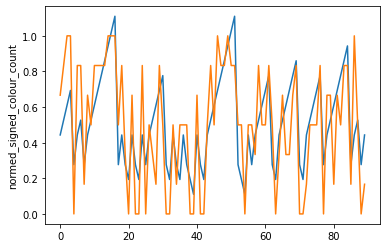

In [32]:
import seaborn as sns

sns.lineplot(data=trials.normed_signed_colour_count + 0.11)
sns.lineplot(data=tmp)

In [34]:
uuids

dict_keys(['61005d2e9b8bac27eba5b984', '610995bd91de0e899effd73d', '599186630675b100014daddd', '6119884fd696463d717432c9', '610bb05be2e705f3e47e87fb', '610824959b488e57fa8a4a33', '60f0937892bd49086d6e2a77', '5cf656e90acc8f000147f643', '5fe292a28fd71dea34d04453', '5d341b57a48ae7000114152a'])